In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time

from sklearn import tree
import sklearn 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#to import the dataset
df = pd.read_csv('E:/SA/summeranalytics2020/train.csv')

In [3]:
#to see the top 5 rows
df.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [4]:
#to see the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Id                       1628 non-null   int64 
 1   Age                      1628 non-null   int64 
 2   Attrition                1628 non-null   int64 
 3   BusinessTravel           1628 non-null   object
 4   Department               1628 non-null   object
 5   DistanceFromHome         1628 non-null   int64 
 6   Education                1628 non-null   int64 
 7   EducationField           1628 non-null   object
 8   EmployeeNumber           1628 non-null   int64 
 9   EnvironmentSatisfaction  1628 non-null   int64 
 10  Gender                   1628 non-null   object
 11  JobInvolvement           1628 non-null   int64 
 12  JobRole                  1628 non-null   object
 13  JobSatisfaction          1628 non-null   int64 
 14  MaritalStatus            1628 non-null  

In [5]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

In [6]:
df["Attrition"].value_counts()

0    843
1    785
Name: Attrition, dtype: int64

In [7]:
df['BusinessTravel'] = labelencoder.fit_transform(df['BusinessTravel'])
df['Department'] = labelencoder.fit_transform(df['Department'])
df['EducationField'] = labelencoder.fit_transform(df['EducationField'])
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['JobRole'] = labelencoder.fit_transform(df['JobRole'])
df['MaritalStatus'] = labelencoder.fit_transform(df['MaritalStatus'])
df['OverTime'] = labelencoder.fit_transform(df['OverTime'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Id                       1628 non-null   int64
 1   Age                      1628 non-null   int64
 2   Attrition                1628 non-null   int64
 3   BusinessTravel           1628 non-null   int32
 4   Department               1628 non-null   int32
 5   DistanceFromHome         1628 non-null   int64
 6   Education                1628 non-null   int64
 7   EducationField           1628 non-null   int32
 8   EmployeeNumber           1628 non-null   int64
 9   EnvironmentSatisfaction  1628 non-null   int64
 10  Gender                   1628 non-null   int32
 11  JobInvolvement           1628 non-null   int64
 12  JobRole                  1628 non-null   int32
 13  JobSatisfaction          1628 non-null   int64
 14  MaritalStatus            1628 non-null   int32
 15  Mont

In [9]:
#to check correlation
df.corr(method ='pearson')

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
Id,1.000000,-0.156452,0.694838,-0.005216,0.062916,0.072305,-0.035610,0.026310,-0.038404,-0.100908,...,0.022698,-0.118617,-0.193855,-0.080326,-0.156880,-0.183577,-0.039062,-0.164596,0.083742,NaN
Age,-0.156452,1.000000,-0.200596,0.008455,0.043658,0.020658,0.219237,-0.118817,0.024386,0.001950,...,0.002982,0.126257,0.675578,0.004789,0.355438,0.266728,0.222113,0.263792,0.019341,NaN
Attrition,0.694838,-0.200596,1.000000,-0.029573,0.099875,0.109224,-0.041390,0.046867,-0.051512,-0.111746,...,0.010202,-0.175496,-0.262922,-0.105663,-0.230061,-0.269408,-0.050379,-0.222752,0.103379,NaN
BusinessTravel,-0.005216,0.008455,-0.029573,1.000000,0.009503,-0.036679,0.085965,0.066068,-0.028489,0.078620,...,-0.046572,-0.004431,0.005841,0.000637,-0.006237,0.009472,-0.031309,-0.030925,-0.000500,NaN
Department,0.062916,0.043658,0.099875,0.009503,1.000000,-0.041649,0.014336,-0.006380,-0.003568,-0.028180,...,-0.038672,-0.080669,0.035860,0.081979,0.045319,0.069065,0.072561,0.020990,-0.044798,NaN
DistanceFromHome,0.072305,0.020658,0.109224,-0.036679,-0.041649,1.000000,0.023945,-0.081273,0.051568,-0.046390,...,0.071457,0.029378,0.029289,-0.032038,-0.030392,-0.010607,0.004460,-0.004135,-0.036109,NaN
Education,-0.035610,0.219237,-0.041390,0.085965,0.014336,0.023945,1.000000,-0.079994,0.077561,-0.065041,...,-0.036204,0.042585,0.175662,-0.043272,0.145911,0.076579,0.076430,0.121981,0.000223,NaN
EducationField,0.026310,-0.118817,0.046867,0.066068,-0.006380,-0.081273,-0.079994,1.000000,-0.095231,0.094575,...,0.007964,-0.078527,-0.058897,0.098403,-0.045987,-0.020335,-0.050683,-0.028599,-0.017567,NaN
EmployeeNumber,-0.038404,0.024386,-0.051512,-0.028489,-0.003568,0.051568,0.077561,-0.095231,1.000000,0.001229,...,-0.049489,0.126275,0.032632,-0.008625,0.045468,0.019844,0.018699,0.047598,-0.009926,NaN
EnvironmentSatisfaction,-0.100908,0.001950,-0.111746,0.078620,-0.028180,-0.046390,-0.065041,0.094575,0.001229,1.000000,...,-0.041427,-0.006479,-0.019005,0.020531,0.000685,0.008028,0.014325,0.002457,-0.011557,NaN


In [10]:
(df['Attrition'].value_counts()/1470)*100

0    57.346939
1    53.401361
Name: Attrition, dtype: float64

In [11]:
df.describe()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,...,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.0
mean,814.500000,35.645577,0.482187,1.605037,1.299140,9.735258,2.884521,2.291155,1000.985872,2.646192,...,3.155405,0.692260,9.949017,2.752457,6.092752,3.614865,2.049140,3.551597,3.135749,1.0
std,470.107435,9.481794,0.499836,0.621792,0.556196,8.306546,1.020470,1.349723,585.417694,1.125283,...,0.362402,0.864808,7.482936,1.288033,5.921168,3.481051,3.138287,3.494369,1.408770,0.0
min,1.000000,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,407.750000,29.000000,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,509.250000,2.000000,...,3.000000,0.000000,5.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.0
50%,814.500000,34.000000,0.000000,2.000000,1.000000,8.000000,3.000000,2.000000,977.000000,3.000000,...,3.000000,0.000000,8.000000,3.000000,5.000000,2.000000,1.000000,2.000000,3.000000,1.0
75%,1221.250000,42.000000,1.000000,2.000000,2.000000,15.000000,4.000000,3.000000,1494.000000,4.000000,...,3.000000,1.000000,13.000000,3.000000,8.000000,7.000000,2.000000,7.000000,4.000000,1.0
max,1628.000000,60.000000,1.000000,2.000000,2.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,...,4.000000,3.000000,38.000000,6.000000,37.000000,18.000000,15.000000,17.000000,5.000000,1.0


In [12]:
data_n=df[['Age','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','NumCompaniesWorked']]

In [13]:
data_n.corr()

,Age,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NumCompaniesWorked
Age,1.000000,0.509210,0.034546,0.675578,0.355438,0.266728,0.222113,0.263792,0.312099
MonthlyIncome,0.509210,1.000000,-0.017738,0.759658,0.536715,0.418501,0.340080,0.401007,0.169025
PercentSalaryHike,0.034546,-0.017738,1.000000,0.006266,0.002299,0.029127,-0.036528,0.020399,0.015858
TotalWorkingYears,0.675578,0.759658,0.006266,1.000000,0.667632,0.504922,0.395785,0.515849,0.226706
YearsAtCompany,0.355438,0.536715,0.002299,0.667632,1.000000,0.771813,0.607823,0.803554,-0.099854
YearsInCurrentRole,0.266728,0.418501,0.029127,0.504922,0.771813,1.000000,0.568734,0.733661,-0.081803
YearsSinceLastPromotion,0.222113,0.340080,-0.036528,0.395785,0.607823,0.568734,1.000000,0.589437,-0.046999
YearsWithCurrManager,0.263792,0.401007,0.020399,0.515849,0.803554,0.733661,0.589437,1.000000,-0.116915
NumCompaniesWorked,0.312099,0.169025,0.015858,0.226706,-0.099854,-0.081803,-0.046999,-0.116915,1.000000


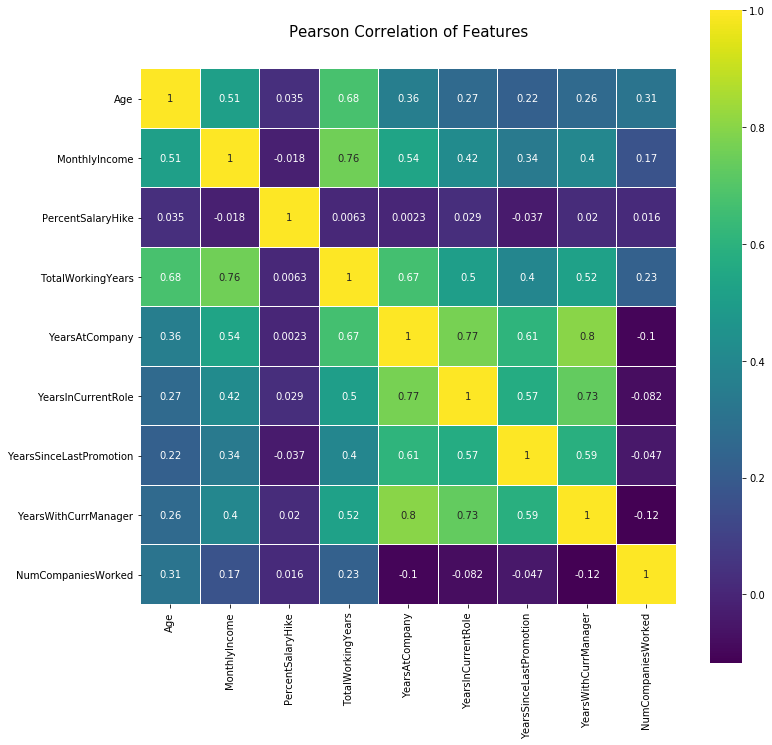

In [14]:
#to create a heatmap
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data_n.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)


In [15]:
y=df['Attrition']
x=df.drop(df.columns[1], axis = 1)

In [16]:
r_state=52
avg_scores = []
parameter_values = np.arange(0,1, 0.01)
for mid in parameter_values:
    estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = r_state
                                            , min_impurity_decrease = mid
                                            )
    scores = cross_val_score(estimator, x, y, scoring='accuracy', cv = 10)
    avg_scores.append(np.mean(scores))
mid_opt = np.argmax(avg_scores)
print("The optimal value of 'min_impurity_decrease' is {0:.2f}".format(parameter_values[mid_opt])+
      " giving accuracy {0:.2f}".format(avg_scores[mid_opt]))

The optimal value of 'min_impurity_decrease' is 0.00 giving accuracy 1.00


In [17]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = r_state
                                       , min_impurity_decrease = 0.007
                                       )
model=estimator.fit(x,y)
y_pred = estimator.predict(x)
accuracy_full = np.mean(y == y_pred) * 100
print("The accuracy on full training set is {0:.1f}%".format(accuracy_full))

The accuracy on full training set is 100.0%


In [18]:
#important libraries to fit model
from sklearn import svm
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC


In [19]:
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(x, y)
print("Num Features: "+str(fit.n_features_))
print("Selected Features: "+str(fit.support_))
print("Feature Ranking: "+str(fit.ranking_))


Num Features: 3
Selected Features: [False  True False False False False False False False False False False
 False  True False False  True False False False False False False False
 False False False False]
Feature Ranking: [24  1 15 22 21 18 10 25  4 12  2 11  3  1 26 13  1 23 19  5 14  8 17  7
  9 16  6 20]


In [20]:
def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()
cv = CountVectorizer()
cv.fit(x)
print (len(cv.vocabulary_))
print (cv.get_feature_names())

28
['attrition', 'behaviour', 'businesstravel', 'communicationskill', 'department', 'distancefromhome', 'education', 'educationfield', 'employeenumber', 'environmentsatisfaction', 'gender', 'id', 'jobinvolvement', 'jobrole', 'jobsatisfaction', 'maritalstatus', 'monthlyincome', 'numcompaniesworked', 'overtime', 'percentsalaryhike', 'performancerating', 'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']


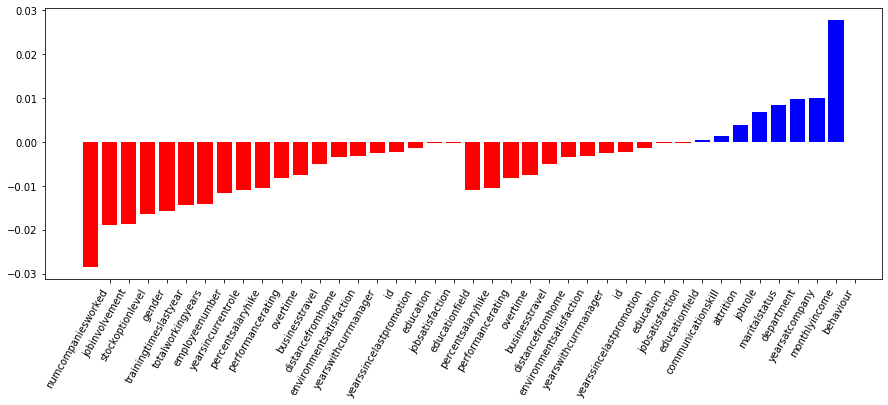

In [21]:
svm = LinearSVC()
svm.fit(x, y)
plot_coefficients(svm, cv.get_feature_names())


In [22]:
#start_time = time.time()

train, test = sklearn.model_selection.train_test_split(df, train_size = 0.75,random_state=r_state)
train, val = sklearn.model_selection.train_test_split(train, train_size = 0.75,random_state=r_state)
print("For Main Data Set :",df['Attrition'].count())
print("For Train Set :",train['Attrition'].count())
print("For Validation Set :",val['Attrition'].count())
print("For Test Set :",test['Attrition'].count())


For Main Data Set : 1628
For Train Set : 915
For Validation Set : 306
For Test Set : 407


In [23]:
x_train=train.drop(train.columns[1], axis = 1)
x_val=val.drop(val.columns[1], axis = 1)
x_test=test.drop(test.columns[1], axis = 1)
y_train=train['Attrition']
y_val=val['Attrition']
y_test=test['Attrition']

Acc Train: 0.869945, Acc Val:0.830065
Acc Train: 0.864481, Acc Val:0.800654
Acc Train: 0.897268, Acc Val:0.852941
Acc Train: 0.908197, Acc Val:0.875817
Acc Train: 0.974863, Acc Val:0.970588
Acc Train: 0.990164, Acc Val:0.986928
Acc Train: 0.998907, Acc Val:1.000000
Acc Train: 1.000000, Acc Val:1.000000
Acc Train: 1.000000, Acc Val:1.000000
Acc Train: 1.000000, Acc Val:1.000000
Acc Train: 1.000000, Acc Val:1.000000
Acc Train: 1.000000, Acc Val:1.000000
Acc Train: 1.000000, Acc Val:1.000000


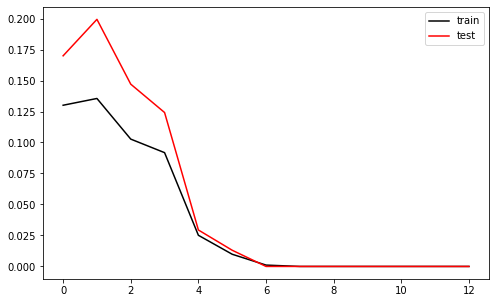

In [24]:
C_values = [0.00075,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0,100.0,500.0]
prediction_error = []
train_error = []

for C_val in C_values:
    clf = LogisticRegression(C=C_val,max_iter=10000,random_state=52)
    clf.fit(x_train, y_train)
    score_train = clf.score(x_train, y_train)
    score_test = clf.score(x_val,y_val)
    train_error.append(1-score_train)
    prediction_error.append(1-score_test)
    #val_error.append(1-score_val) 
    print("Acc Train: %f, Acc Val:%f"%(score_train,score_test))
plt.figure(1, figsize=(8, 5))
plt.clf()
plt.plot(range(len(C_values)),train_error,color='k',label='train')
plt.plot(range(len(C_values)),prediction_error,color='r',label='test')
plt.legend(loc=1)
plt.show()


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(C=10,max_iter=750,random_state=52)
logreg.fit(x_train, y_train)



LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=750,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=52, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=52)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.859


In [27]:
logreg = LogisticRegression(random_state=52,C=10)
logreg.fit(x_train, y_train)
logreg = LogisticRegression(random_state=52,C=10)
logreg.fit(x_train, y_train)


model=logreg
pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))


True         0    1
Predicted          
0          193   35
1           17  162
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       210
           1       0.91      0.82      0.86       197

    accuracy                           0.87       407
   macro avg       0.88      0.87      0.87       407
weighted avg       0.87      0.87      0.87       407

0.8722358722358723


In [32]:
# Calculate the AUC
fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)

ROC AUC: 0.87


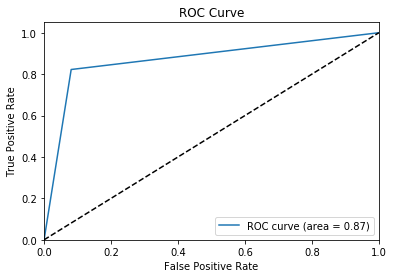

In [33]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [34]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,pred)
# Now on smote Data
# Since our data set is imbalanced lets try balancing it
# In [25]:
y_train.value_counts()

0    478
1    437
Name: Attrition, dtype: int64

In [35]:
testset=pd.read_csv('E:/SA/summeranalytics2020/test.csv')

In [36]:
testset

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,...,4,1,5,3,5,2,0,4,5,1
1,2,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,...,4,2,13,4,7,7,5,7,3,1
2,3,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,...,3,2,13,2,7,7,6,7,4,1
3,4,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,...,3,1,8,4,4,3,0,2,5,1
4,5,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,...,3,0,9,5,9,7,0,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,466,32,Travel_Rarely,Research & Development,2,4,Life Sciences,1692,4,Male,...,3,0,1,2,1,0,0,0,5,1
466,467,18,Travel_Frequently,Sales,3,2,Medical,1624,2,Female,...,3,0,0,2,0,0,0,0,2,1
467,468,24,Travel_Rarely,Research & Development,23,3,Medical,639,2,Male,...,3,2,6,3,6,5,1,4,1,1
468,469,31,Travel_Rarely,Research & Development,23,3,Medical,367,2,Male,...,4,1,10,2,9,0,7,8,3,1


In [37]:
x_train

,Id,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
1180,1181,1,2,2,3,2,1,720,1,0,...,3,0,4,3,2,2,2,0,4,1
773,774,0,1,1,2,2,3,1760,3,0,...,3,1,9,4,6,1,0,5,2,1
1371,1372,1,2,2,11,3,2,840,3,0,...,3,2,9,3,9,8,7,7,2,1
1288,1289,1,2,1,1,3,1,331,4,1,...,3,0,4,2,3,2,1,2,1,1
1501,1502,1,2,2,2,4,2,1862,3,1,...,3,0,7,3,2,2,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,534,0,2,2,9,2,3,1548,1,1,...,3,0,9,5,8,4,7,1,3,1
831,832,0,1,0,10,3,3,1746,1,1,...,3,1,3,2,2,2,2,1,2,1
754,755,0,2,1,7,3,4,1417,3,1,...,3,0,8,2,7,7,0,7,5,1
1128,1129,1,2,1,2,4,1,364,1,1,...,3,0,5,5,0,0,0,0,3,1


In [39]:
testset['BusinessTravel'] = labelencoder.fit_transform(testset['BusinessTravel'])
testset['Department'] = labelencoder.fit_transform(testset['Department'])
testset['EducationField'] = labelencoder.fit_transform(testset['EducationField'])
testset['Gender'] = labelencoder.fit_transform(testset['Gender'])
testset['JobRole'] = labelencoder.fit_transform(testset['JobRole'])
testset['MaritalStatus'] = labelencoder.fit_transform(testset['MaritalStatus'])
testset['OverTime'] = labelencoder.fit_transform(testset['OverTime'])

In [46]:
y_train = df['Attrition']

In [42]:
x_train=df.drop('Attrition',axis = 1)

In [47]:
Lr=LogisticRegression(solver='lbfgs',max_iter=5000,C=0.5,penalty='l2',random_state=1)

In [48]:
Lr.fit(x_train,y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
a = Lr.predict_proba(testset)

In [50]:
a

array([[9.92977736e-01, 7.02226414e-03],
       [9.97891527e-01, 2.10847300e-03],
       [9.74211753e-01, 2.57882473e-02],
       [9.64568004e-01, 3.54319965e-02],
       [9.98416415e-01, 1.58358517e-03],
       [9.95696145e-01, 4.30385507e-03],
       [9.72742413e-01, 2.72575871e-02],
       [9.93760272e-01, 6.23972795e-03],
       [9.66461512e-01, 3.35384882e-02],
       [9.96821773e-01, 3.17822734e-03],
       [9.99363427e-01, 6.36573324e-04],
       [9.77138947e-01, 2.28610525e-02],
       [9.98343573e-01, 1.65642692e-03],
       [9.91196611e-01, 8.80338920e-03],
       [9.96340959e-01, 3.65904143e-03],
       [9.84908760e-01, 1.50912404e-02],
       [9.70684171e-01, 2.93158288e-02],
       [9.56972381e-01, 4.30276192e-02],
       [9.95126978e-01, 4.87302234e-03],
       [9.98026650e-01, 1.97334979e-03],
       [9.98939211e-01, 1.06078909e-03],
       [6.57082340e-01, 3.42917660e-01],
       [9.96267380e-01, 3.73261995e-03],
       [9.95095484e-01, 4.90451627e-03],
       [9.907999

In [51]:
b = a[:,1]

In [52]:
c = pd.DataFrame(b)

In [53]:
c

,0
0,0.007022
1,0.002108
2,0.025788
3,0.035432
4,0.001584
...,...
465,0.210514
466,0.629668
467,0.126458
468,0.300248
